In [2]:
import pandas as pd
import numpy as np

In [18]:
df_1 = pd.read_csv('yifeisun_si618_project1_RevenueCount.tsv', sep='\t')
df_1 = df_1[["Unnamed: 0","All Languages All Genres:","Unnamed: 3","23","0"]]
df_1.columns = ["Year","Kind","Value","Count","Total Revenue"]
df_1 = df_1.dropna(subset=['Year'])
df_1["Year"] = df_1["Year"].astype(int)
df_1 = df_1[df_1["Total Revenue"] != 0]
df_1

,Year,Kind,Value,Count,Total Revenue
231,1915,All Languages All Genres:,NaN,10,11000000
236,1915,Genre:,Drama,14,11137365
239,1915,Genre:,History,2,11000000
241,1915,Genre:,War,4,11000000
246,1915,Language:,No Language,4,11000000
...,...,...,...,...,...
4383,2017,Language:,தமிழ்,3,247000000
4385,2017,Language:,广州话 / 廣州話,3,100541806
4386,2017,Language:,日本語,5,169801921
4388,2017,Language:,한국어/조선말,5,56100000


In [21]:
df_1_all = df_1[df_1["Kind"] == "All Languages All Genres:"]
df_1_all = df_1_all[["Year","Count","Total Revenue"]]
df_1_all.columns = ["Year","Total Count","Total Revenue"]
df_1_all

,Year,Total Count,Total Revenue
231,1915,10,11000000
247,1916,12,8000000
272,1918,9,8000000
313,1921,21,2500000
329,1922,19,400200
...,...,...,...
4065,2013,1727,26571949134
4134,2014,1804,26441881574
4207,2015,1746,28739562703
4275,2016,1486,30497876509


In [32]:
df_1_genre = df_1[df_1["Kind"] == "Genre:"]
df_1_genre = df_1_genre[["Year","Value","Count","Total Revenue"]]
df_1_genre.columns = ["Year","Genre","Count","Revenue"]
df_1_genre

,Year,Genre,Count,Revenue
236,1915,Drama,14,11137365
239,1915,History,2,11000000
241,1915,War,4,11000000
248,1916,Action,1,8000000
249,1916,Adventure,2,8000000
...,...,...,...,...
4352,2017,Romance,54,1741155677
4353,2017,Science Fiction,59,3329742561
4355,2017,Thriller,111,4199108967
4356,2017,War,17,1139559610


In [38]:
df = df_1_genre.groupby(['Genre']).sum().sort_values(by="Count", ascending=False)
count_list = list(df.index)
count_list

['Drama',
 'Comedy',
 'Thriller',
 'Romance',
 'Action',
 'Horror',
 'Crime',
 'Documentary',
 'Adventure',
 'Science Fiction',
 'Family',
 'Mystery',
 'Fantasy',
 'Animation',
 'Music',
 'History',
 'Foreign',
 'War',
 'Western',
 'TV Movie']

In [44]:
count_list_1 = count_list[:5]
count_list_2 = count_list[5:10]
count_list_3 = count_list[10:15]
count_list_4 = count_list[15:]

In [40]:
df = df_1_genre.groupby(['Genre']).sum().sort_values(by="Revenue", ascending=False)
revenue_list = list(df.index)
revenue_list

['Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Thriller',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'Animation',
 'Crime',
 'Mystery',
 'Horror',
 'War',
 'History',
 'Music',
 'Western',
 'Documentary',
 'Foreign',
 'TV Movie']

In [43]:
revenue_list_1 = revenue_list[:5]
revenue_list_2 = revenue_list[5:10]
revenue_list_3 = revenue_list[10:15]
revenue_list_4 = revenue_list[15:]

In [47]:
df_1_genre = df_1[df_1["Kind"] == "Genre:"]
df_1_genre = df_1_genre[["Year","Value","Count","Total Revenue"]]
df_1_genre.columns = ["Year","Genre","Count","Revenue"]
df_1_genre = df_1_genre.merge(df_1_all,on="Year")
df_1_genre["Count Percentage"] = df_1_genre["Count"]/df_1_genre["Total Count"]
df_1_genre["Revenue Percentage"] = df_1_genre["Revenue"]/df_1_genre["Total Revenue"]
df_1_genre = df_1_genre[["Year","Genre","Count Percentage","Revenue Percentage"]]
df_1_genre = df_1_genre[df_1_genre["Count Percentage"]<=1]
df_1_genre = df_1_genre[df_1_genre["Revenue Percentage"]<=1]
df_1_genre

,Year,Genre,Count Percentage,Revenue Percentage
1,1915,History,0.200000,1.000000
2,1915,War,0.400000,1.000000
3,1916,Action,0.083333,1.000000
4,1916,Adventure,0.166667,1.000000
5,1916,Drama,0.833333,1.000000
...,...,...,...,...
1275,2017,Romance,0.105263,0.115493
1276,2017,Science Fiction,0.115010,0.220866
1277,2017,Thriller,0.216374,0.278533
1278,2017,War,0.033138,0.075589


In [65]:
df_1_lang = df_1[df_1["Kind"] == "Language:"]
df_1_lang = df_1_lang[["Year","Value","Count","Total Revenue"]]
df_1_lang.columns = ["Year","Language","Count","Revenue"]
df_1_lang = df_1_lang.merge(df_1_all,on="Year")
df_1_lang["Count Percentage"] = df_1_lang["Count"]/df_1_lang["Total Count"]
df_1_lang["Revenue Percentage"] = df_1_lang["Revenue"]/df_1_lang["Total Revenue"]
df_1_lang = df_1_lang[["Year","Language","Count Percentage","Revenue Percentage"]]
df_1_lang = df_1_lang[df_1_lang["Count Percentage"]<=1]
df_1_lang = df_1_lang[df_1_lang["Revenue Percentage"]<=1]
df_1_lang

,Year,Language,Count Percentage,Revenue Percentage
0,1915,No Language,0.400000,1.000000
1,1916,English,0.750000,1.000000
2,1918,English,0.444444,1.000000
3,1921,No Language,0.238095,1.000000
4,1922,No Language,0.157895,1.000000
...,...,...,...,...
716,2017,தமிழ்,0.005848,0.016384
717,2017,广州话 / 廣州話,0.005848,0.006669
718,2017,日本語,0.009747,0.011263
719,2017,한국어/조선말,0.009747,0.003721


In [66]:
df_1_dict_year = {}
for year in list(set(list(df_1_lang["Year"]))):
    df_1_dict_year[year] = df_1_lang[df_1_lang["Year"] == year]

In [67]:
df_1_dict_lang = {}
for lang in list(set(list(df_1_lang["Language"]))):
    df_1_dict_lang[lang] = df_1_lang[df_1_lang["Language"] == lang]

In [72]:
df_1_lang = df_1[df_1["Kind"] == "Language:"]
df_1_lang = df_1_lang[["Year","Value","Count","Total Revenue"]]
df_1_lang.columns = ["Year","Language","Count","Revenue"]
df_1_lang

,Year,Language,Count,Revenue
246,1915,No Language,4,11000000
261,1916,English,9,8000000
280,1918,English,4,8000000
328,1921,No Language,5,2500000
347,1922,No Language,3,400200
...,...,...,...,...
4383,2017,தமிழ்,3,247000000
4385,2017,广州话 / 廣州話,3,100541806
4386,2017,日本語,5,169801921
4388,2017,한국어/조선말,5,56100000


In [73]:
df = df_1_lang.groupby(['Language']).sum().sort_values(by="Count", ascending=False)
count_list = list(df.index)
count_list

['English',
 'Français',
 'Deutsch',
 'Español',
 '日本語',
 'Italiano',
 'Pусский',
 'हिन्दी',
 '한국어/조선말',
 '广州话 / 廣州話',
 '普通话',
 'العربية',
 'Português',
 'Český',
 'Dansk',
 'Nederlands',
 'svenska',
 'suomi',
 'Polski',
 'தமிழ்',
 'Türkçe',
 'No Language',
 'فارسی',
 'ελληνικά',
 'Norsk',
 'Română',
 'עִבְרִית',
 'తెలుగు',
 'Magyar',
 'ภาษาไทย',
 'Latin',
 'Srpski',
 'Català',
 'Afrikaans',
 'বাংলা',
 'Bahasa indonesia',
 'български език',
 'اردو',
 'shqip',
 'Íslenska',
 'Bamanankan',
 'Український',
 'ქართული',
 'Hrvatski',
 'Eesti',
 'Esperanto',
 '?????',
 'ਪੰਜਾਬੀ',
 'Tiếng Việt',
 'Kiswahili',
 'Galego',
 'Gaeilge',
 'Bosanski',
 'Somali']

In [75]:
df = df_1_lang.groupby(['Language']).sum().sort_values(by="Revenue", ascending=False)
revenue_list = list(df.index)
revenue_list

['English',
 'Français',
 'Deutsch',
 'Español',
 '普通话',
 '日本語',
 'العربية',
 'हिन्दी',
 '广州话 / 廣州話',
 'Pусский',
 'Italiano',
 'Latin',
 'Český',
 'Română',
 'עִבְרִית',
 'ελληνικά',
 'svenska',
 'Português',
 '한국어/조선말',
 'Magyar',
 'தமிழ்',
 'Afrikaans',
 'български език',
 'Íslenska',
 'ภาษาไทย',
 'Dansk',
 'Nederlands',
 'Eesti',
 'Türkçe',
 'Український',
 'বাংলা',
 'Polski',
 'shqip',
 'Esperanto',
 'Kiswahili',
 'Hrvatski',
 'No Language',
 'Tiếng Việt',
 'suomi',
 'తెలుగు',
 'Galego',
 'Norsk',
 'Català',
 'Gaeilge',
 'Somali',
 'Srpski',
 'فارسی',
 'ਪੰਜਾਬੀ',
 'Bahasa indonesia',
 'اردو',
 'Bamanankan',
 'Bosanski',
 'ქართული',
 '?????']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in count_list_1:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Count Percentage"], label = genre)
plt.title("Count Percentage of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

In [48]:
df_1_dict_year = {}
for year in list(set(list(df_1_genre["Year"]))):
    df_1_dict_year[year] = df_1_genre[df_1_genre["Year"] == year]

In [49]:
df_1_dict_genre = {}
for genre in list(set(list(df_1_genre["Genre"]))):
    df_1_dict_genre[genre] = df_1_genre[df_1_genre["Genre"] == genre]

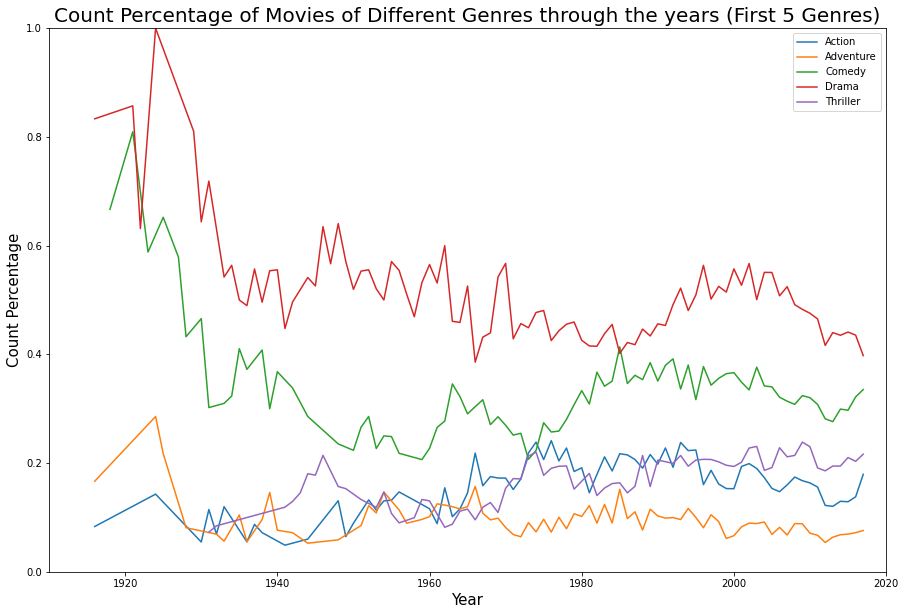

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in count_list_1:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Count Percentage"], label = genre)
plt.title("Count Percentage of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

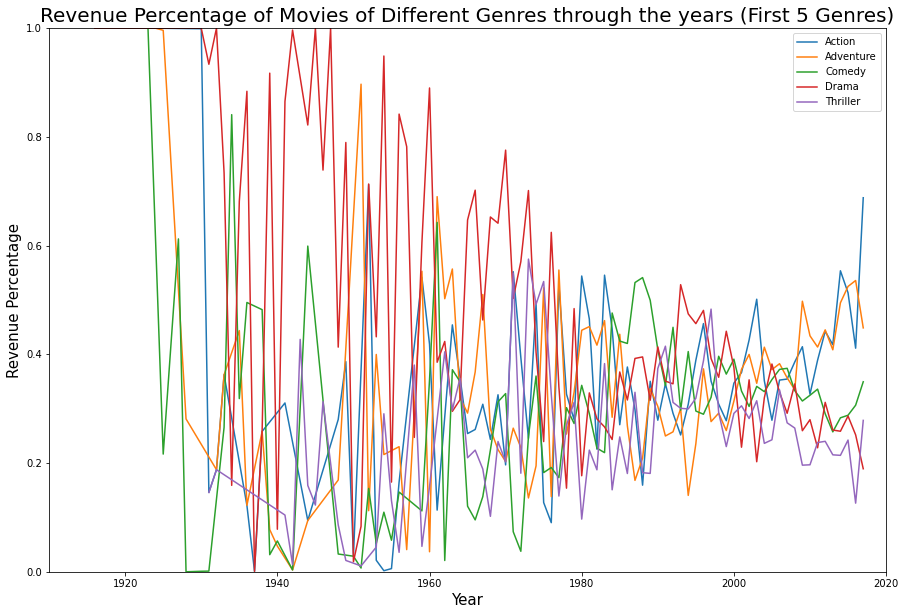

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_1:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

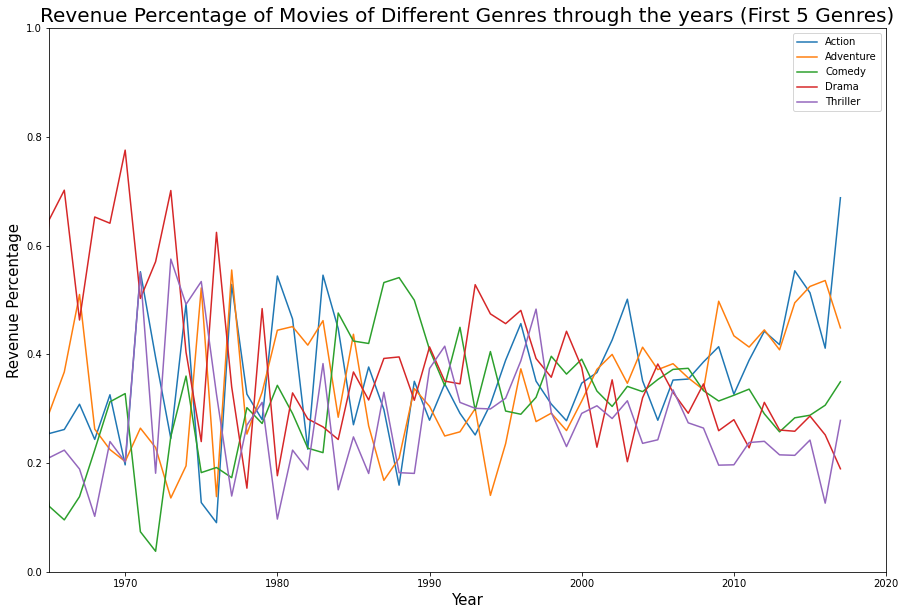

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_1:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (First 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1965, 2020])
plt.legend()
plt.show()

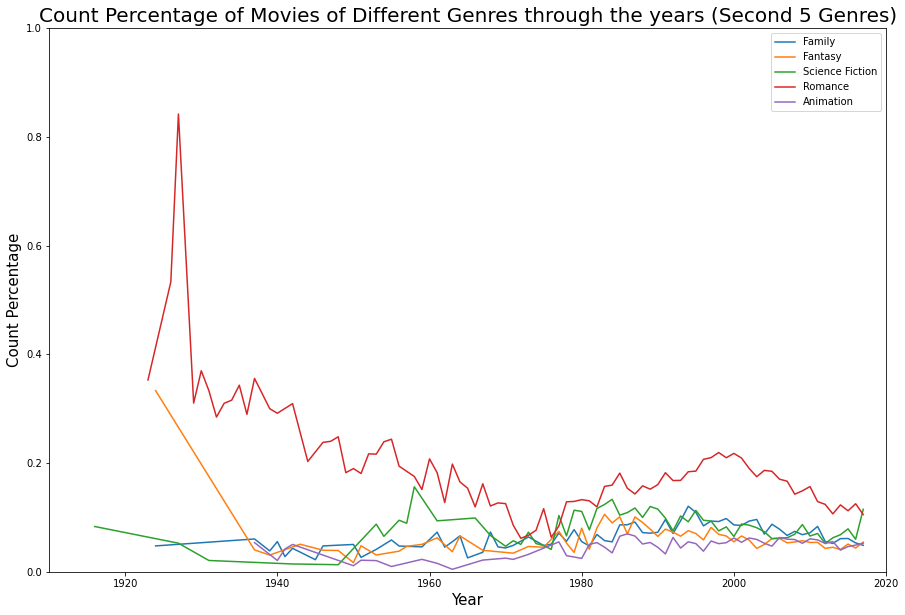

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in count_list_2:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Count Percentage"], label = genre)
plt.title("Count Percentage of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

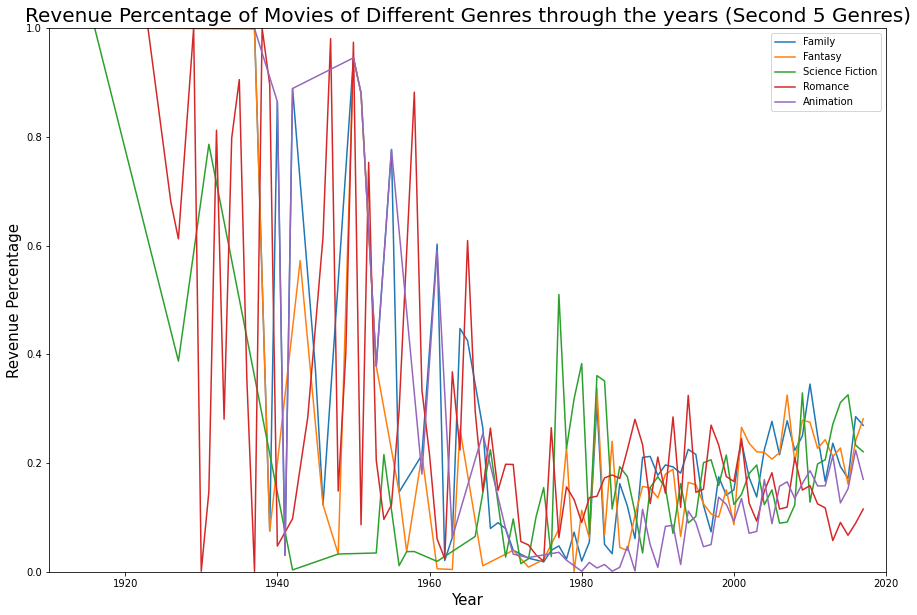

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_2:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

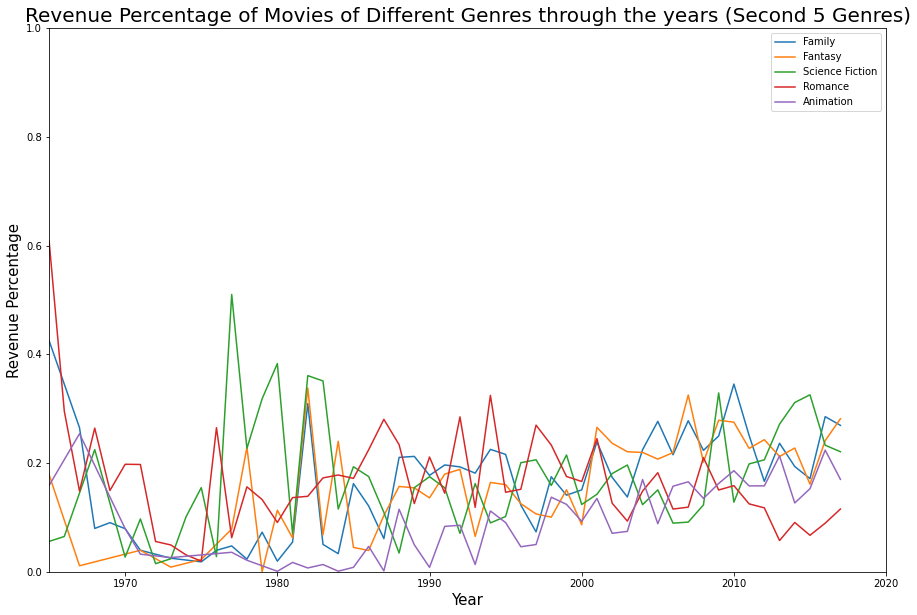

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_2:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Second 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1965, 2020])
plt.legend()
plt.show()

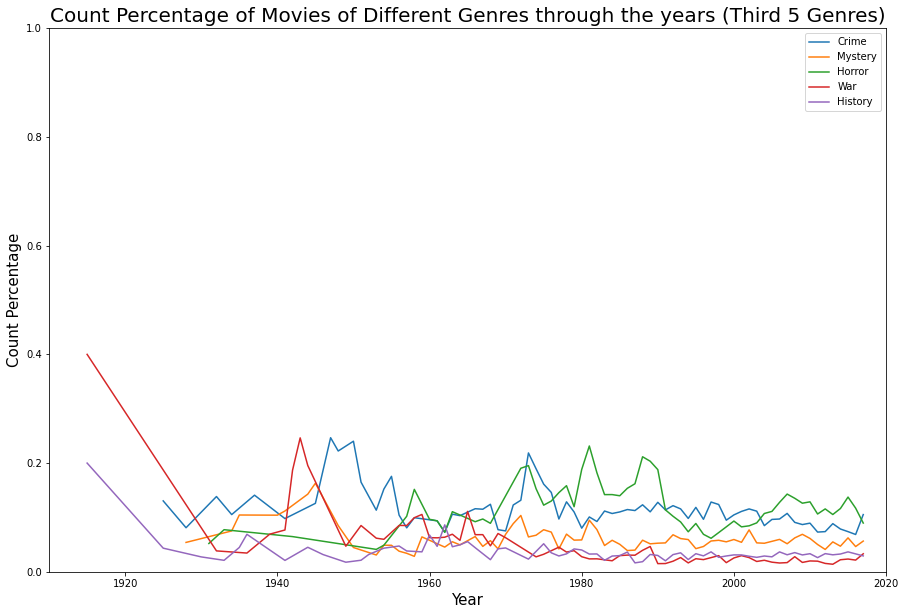

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in count_list_3:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Count Percentage"], label = genre)
plt.title("Count Percentage of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

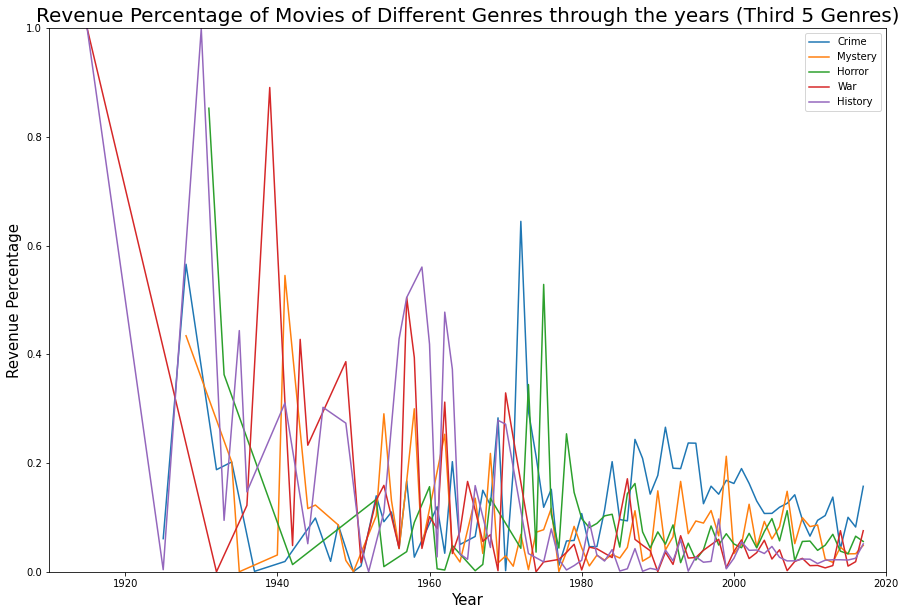

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_3:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

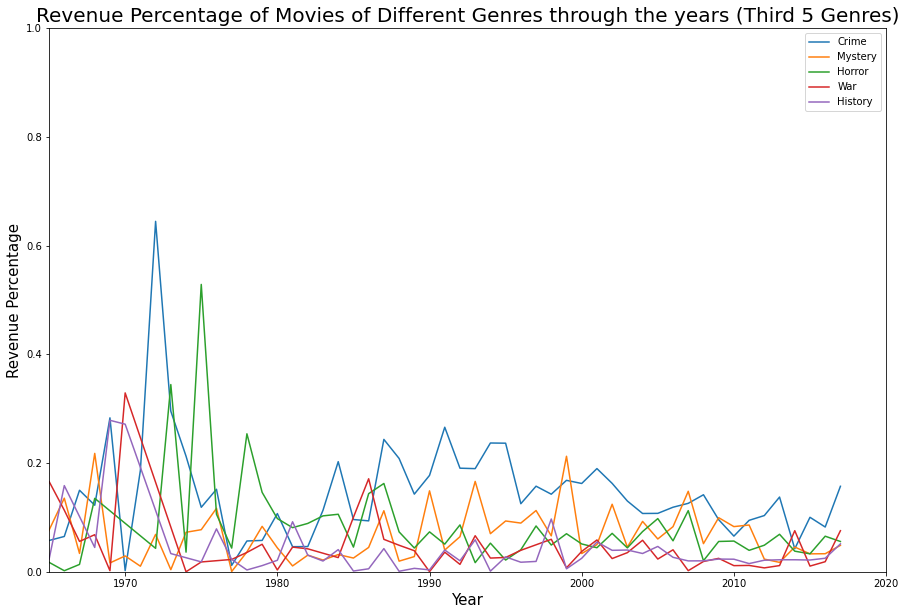

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_3:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Third 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1965, 2020])
plt.legend()
plt.show()

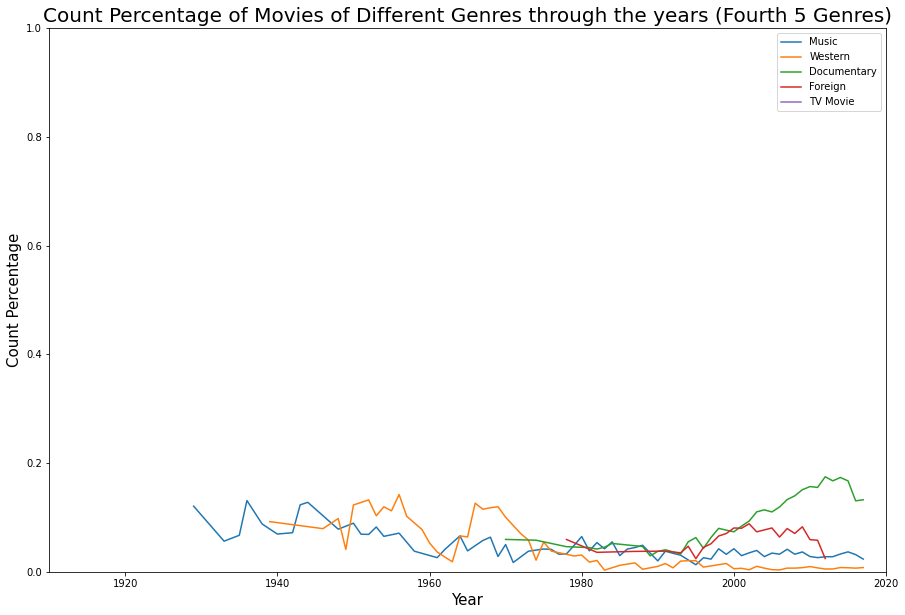

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in count_list_4:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Count Percentage"], label = genre)
plt.title("Count Percentage of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

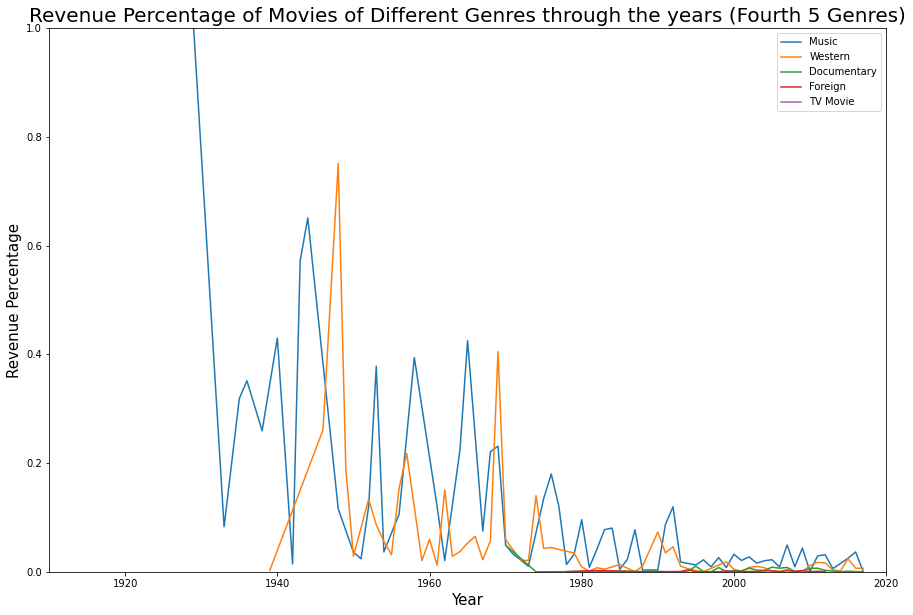

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_4:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1910, 2020])
plt.legend()
plt.show()

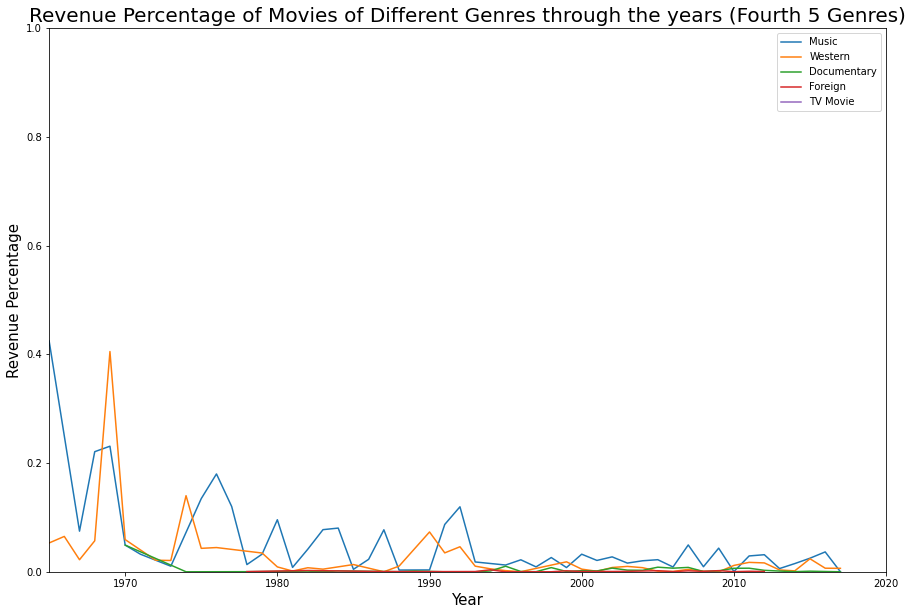

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for genre in revenue_list:
    if genre in revenue_list_4:
        df = df_1_dict_genre[genre]
        plt.plot(df["Year"], df["Revenue Percentage"], label = genre)
plt.title("Revenue Percentage of Movies of Different Genres through the years (Fourth 5 Genres)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Revenue Percentage", fontsize=15)
plt.ylim([0, 1])
plt.xlim([1965, 2020])
plt.legend()
plt.show()

In [ ]:
df_1_lang = df_1[df_1["Kind"] == "Language:"]